![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 6

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split. (_done_)
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

### Linear Regression

- Train-test split.
- Apply linear regression.

### Model Validation

- Description:
  - R2.
  - MSE.
  - RMSE.
  - MAE.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

<Axes: >

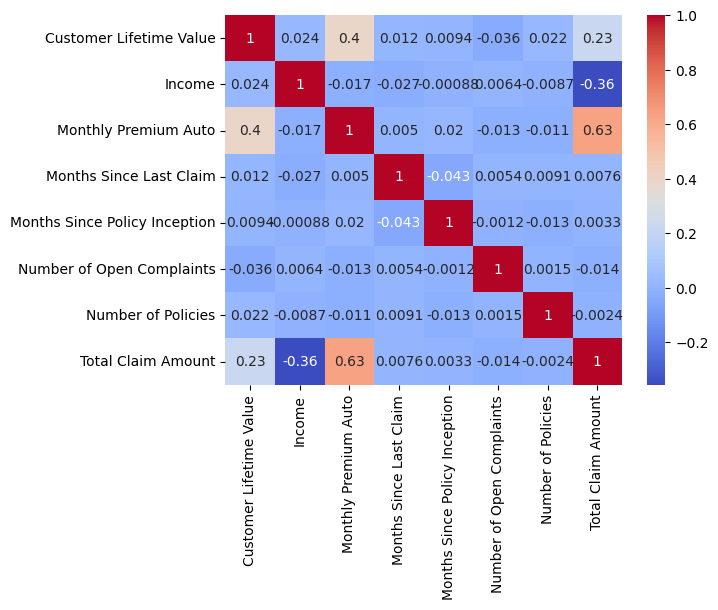

In [5]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [6]:
y = data['Total Claim Amount']
x = data.drop('Total Claim Amount', axis=1)

In [7]:
x_cat = x.select_dtypes(include='object')
x_num = x.select_dtypes(include=('float', 'int'))


In [8]:
x_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [9]:
x_num = x_num.drop(['Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies'], axis=1)
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73
...,...,...,...
9129,23405.987980,71941,73
9130,3096.511217,21604,79
9131,8163.890428,0,85
9132,7524.442436,21941,96


In [10]:
transformer = StandardScaler().fit(x_num)
x_standard = transformer.transform(x_num)
x_standard

array([[-0.76287773,  0.61282744, -0.70392465],
       [-0.14924546, -1.23961684,  0.02269103],
       [ 0.71063622,  0.36570978,  0.42959581],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062],
       [-0.06993547, -0.51735647,  0.08082028],
       [-0.78495478, -1.23961684, -0.47140763]])

In [11]:
x_cat = x_cat.drop(['Customer', 'State', 'Response', 'Coverage', 'Education','Effective To Date', 'Location Code','Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type','Sales Channel', 'Vehicle Size'], axis=1)
x_cat

,EmploymentStatus,Gender,Vehicle Class
0,Employed,F,Two-Door Car
1,Unemployed,F,Four-Door Car
2,Employed,F,Two-Door Car
3,Unemployed,M,SUV
4,Employed,M,Four-Door Car
...,...,...,...
9129,Employed,M,Four-Door Car
9130,Employed,F,Four-Door Car
9131,Unemployed,M,Four-Door Car
9132,Employed,M,Four-Door Car


In [12]:
#x_cat['Gender'].unique()
#x_cat['EmploymentStatus'].unique()
x_cat['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [13]:
onehot_encoder = OneHotEncoder().fit(x_cat)
encoded = onehot_encoder.transform(x_cat).toarray()
encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
np.unique(encoded)

array([0., 1.])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_standard,y,test_size=0.2,random_state=23)

In [17]:
len(X_train) == len(y_train)

True

In [18]:
from sklearn import linear_model
lm = linear_model.LinearRegression().fit(X_train, y_train)

In [19]:
predict = lm.predict(X_train)
predict

array([ 457.81855078,  394.97447525,  884.31433463, ...,  351.01449582,
       1121.04018968,  342.66676522])

In [20]:
y_train

5190     117.871165
1662      73.719521
2139    1116.000000
3801     206.950760
2399     353.778990
           ...     
3674     599.000883
39       157.397849
347      260.879903
6175    1956.368115
8787     384.000000
Name: Total Claim Amount, Length: 7307, dtype: float64

Aqui Se saco el modelo con StandardScaler y con ONeHotIncoder

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [22]:
r2 = r2_score(y_train,predict)
mse = mean_squared_error(y_train, predict)
rmse = math.sqrt(mse)

In [23]:
print('r2 = ', r2 , '\t MSE = ', mse, '\t RMSE = ', rmse)

r2 =  0.5179728216337832 	 MSE =  40119.00453393721 	 RMSE =  200.29729038091656


Aqui provaremos otros metodos de normalizacion

In [33]:
transformer2 = MinMaxScaler().fit(x_num)
x_standard2 = transformer2.transform(x_num)
x_standard2

array([[0.01062925, 0.56284694, 0.03375527],
       [0.06240565, 0.        , 0.13924051],
       [0.13495982, 0.48776267, 0.19831224],
       ...,
       [0.07695057, 0.        , 0.10126582],
       [0.06909758, 0.2194517 , 0.14767932],
       [0.00876645, 0.        , 0.06751055]])

In [36]:
x_cat

,EmploymentStatus,Gender,Vehicle Class
0,Employed,F,Two-Door Car
1,Unemployed,F,Four-Door Car
2,Employed,F,Two-Door Car
3,Unemployed,M,SUV
4,Employed,M,Four-Door Car
...,...,...,...
9129,Employed,M,Four-Door Car
9130,Employed,F,Four-Door Car
9131,Unemployed,M,Four-Door Car
9132,Employed,M,Four-Door Car


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_standard2,y,test_size=0.2,random_state=23)

In [53]:
lm = linear_model.LinearRegression().fit(X_train, y_train)

In [54]:
predict = lm.predict(X_train)
predict

array([419.18786911, 622.98572667, 225.54559646, ..., 408.03718412,
       392.13445516, 360.04238915])

In [55]:
r2 = r2_score(y_train,predict)
mse = mean_squared_error(y_train, predict)
rmse = math.sqrt(mse)

In [56]:
print('r2 = ', r2 , '\t MSE = ', mse, '\t RMSE = ', rmse)

r2 =  0.5130228290942243 	 MSE =  41065.13986625278 	 RMSE =  202.64535490914363


In [45]:
label_encoder = LabelEncoder().fit(x_cat['Gender'])
encoded = label_encoder.transform(x_cat['Gender'])
encoded

array([0, 0, 0, ..., 1, 1, 1])